#**Synapse Week One**

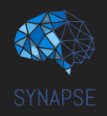

Welcome to Synapse!

Your first task as an ML Developer in this committee is to clear your Exploratory Data Analysis (EDA) concepts. We'll start from the very basics, and make it just a teeny lil bit more complex with every next code cell.

I suppose a nice place to start with would be the definition of EDA. Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualisation methods.

Above each code cell, instructions and resources have been given. Go through the resources, then implement the code accordingly. Feel free to add extra cells to play around on your own as well :p

#installing libraries and importing them

Some libraries like numpy and pandas are already pre installed on Colab. Some need to explicitly installed. A really cool data exploration library called ydata-profiling falls in the latter category. So we use the appropriate pip command to install it.

In [ ]:
!pip install ydata-profiling -q

Mount your Google Drive onto this notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import basic libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling


#loading the dataset

The dataset we wanna nitpick apart this week is one pertaining to crabs. Use this link to download it:

https://drive.google.com/drive/folders/1DqJB3_B-8WyS9z-oEQJm1ayHJalb3xFv?usp=sharing

Upload it to your Google Drive. Then read it into a variable using the pandas library.

In [ ]:
df = pd.read_csv("/content/train.csv")

View the first 5 rows of this DataFrame to see if it has been stored correctly.

In [ ]:
df.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  Age  
0        6.647958      8.348928    9  
1        2.324659      3.401940    8  
2        5.556502      6.662133    9  
3       10.991839     14.996885   11  
4        4.507570      5.953395    8

Right, so now you have your entire DataFrame residing in a variable. But again, what even is a DataFrame? Just speed through the below article.

https://www.databricks.com/glossary/what-are-dataframes



#basic EDA

Here, we aim to get a basic overview of the dataset.


List the columns in this dataset.

In [ ]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB
Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')


You may have noticed that the 'id' column is just indexing the rows in the DataFrame. But we don't really need that, as pandas very neatly handles that for us. So drop that column.

In [ ]:
df.drop('id',axis=1,inplace=True)
df

Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0       I  1.5250    1.1750  0.3750  28.973189       12.728926   
1       I  1.1000    0.8250  0.2750  10.418441        4.521745   
2       M  1.3875    1.1125  0.3750  24.777463       11.339800   
3       F  1.7000    1.4125  0.5000  50.660556       20.354941   
4       I  1.2500    1.0125  0.3375  23.289114       11.977664   
...    ..     ...       ...     ...        ...             ...   
74046   F  1.6625    1.2625  0.4375  50.660556       20.680960   
74047   I  1.0750    0.8625  0.2750  10.446791        4.323299   
74048   F  1.4875    1.2000  0.4125  29.483480       12.303683   
74049   I  1.2125    0.9625  0.3125  16.768729        8.972617   
74050   I  0.9125    0.6750  0.2000   5.386405        2.055339   

       Viscera Weight  Shell Weight  Age  
0            6.647958      8.348928    9  
1            2.324659      3.401940    8  
2            5.556502      6.662133    9  
3           10.991839     14.996885   11  
4            4.507570      5.953395    8  
...               ...           ...  ...  
74046       10.361742     12.332033   10  
74047        2.296310      3.543687    6  
74048        7.540967      8.079607   10  
74049        2.919999      4.280774    8  
74050        1.034757      1.700970    6  

[74051 rows x 9 columns]

Display the the number of rows and columns in this dataset.

In [ ]:
print('number of rows are '+str(df.shape[0]))
print('number of columns are '+str(df.shape[1]))

number of rows are 74051
number of columns are 9


Use the info() function to get, well, info about it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


If done correctly, you'll encounter no null values. How lucky.

What are the statistics of this data? Use describe() function to view them. Google what each of those row headers mean.

In [ ]:
df.describe()

Length      Diameter        Height        Weight  Shucked Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000   
mean       1.317460      1.024496      0.348089     23.385217       10.104270   
std        0.287757      0.237396      0.092034     12.648153        5.618025   
min        0.187500      0.137500      0.000000      0.056699        0.028349   
25%        1.150000      0.887500      0.300000     13.437663        5.712424   
50%        1.375000      1.075000      0.362500     23.799405        9.908150   
75%        1.537500      1.200000      0.412500     32.162508       14.033003   
max        2.012815      1.612500      2.825000     80.101512       42.184056   

       Viscera Weight  Shell Weight           Age  
count    74051.000000  74051.000000  74051.000000  
mean         5.058386      6.723870      9.967806  
std          2.792729      3.584372      3.175189  
min          0.042524      0.042524      1.000000  
25%          2.863300      3.968930      8.000000  
50%          4.989512      6.931453     10.000000  
75%          6.988152      9.071840     11.000000  
max         21.545620     28.491248     29.000000

Write a function to print all the unique values in the columns of Sex and Age.

In [ ]:
print(df['Sex'].unique())
print(df['Age'].unique())

['I' 'M' 'F']
[ 9  8 11 10 12  7  5 14  6 13 16  4 18 15 17  3 19 23 21 20 26 22 27 24
 25 29  2  1]


List out the number of crabs belonging to each gender.

In [ ]:
print(df['Sex'].value_counts())

M    27084
I    23957
F    23010
Name: Sex, dtype: int64


If your output is correct, you'll find the dataset is decently well-balanced, although it is a bit skewed towards male crabs.

#pandas profiling

Doing all the above for each dataset in separate cells gets boring fast. Enter ydata_profiling. You just have to feed a DataFrame to it, and it takes care of basic EDA (and then some more) for you. Resource:

https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/quickstart.html

Run a Profile Report on our dataframe and just go through it.

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A lot of what we did above manually gets handled automatically. Pretty cool, innit?

Also, if you genuinely went through the report, you'll find that some crabs have height as zero. That doesn't make much sense.

Drop all these apparently two dimensional crabs from the dataset. Get rid of all rows where height is zero.

In [ ]:
df = df[df.Height != 0]

If done correctly, your DataFrame now will have shape (74027, 9). Check that below.

In [ ]:
df.shape

(74027, 9)

#plotting some stuff out

To explore data properly, data visualisation techniques are employed. What that essentially means that we're gonna plot some graphs and glean meaningful insights from them. We use the matplotlib library for this, and seaborn to make it look real pretty, for no one likes an ugly graph.




#bar charts

Plot a bar graph to view the average age of each sex. For help, refer:

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

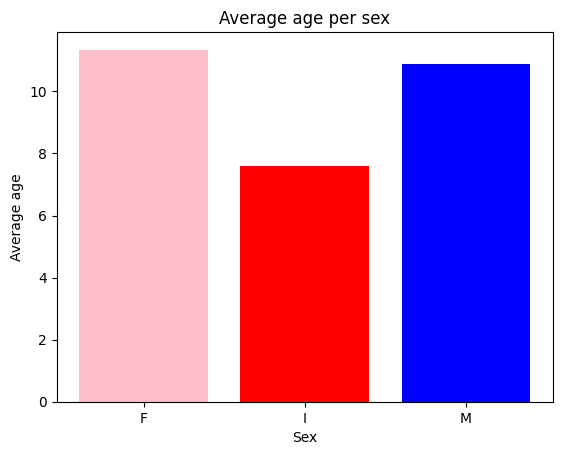

In [ ]:
#Bar graph for categorical data and frequency related
#Histogram for continuous data and to detect outliers efficiently
#Legend mai labels galat aa rhe
average_age_by_sex = df.groupby('Sex')['Age'].mean()
sex = df['Sex'].unique()
colors = ['pink', 'red','blue']
plt.bar(average_age_by_sex.index, average_age_by_sex,color=colors)
plt.title('Average age per sex')
plt.xlabel('Sex')
plt.ylabel('Average age')
plt.show()

x axis will contain Sex, and y axis has the average age.

As with humans, it seems that crabs have their female sex having longer lives on average. Still, all genders have a pretty short lifespan. Shame.  

Anyways, the above bar graph of Average Age and Sex is not the most comprehensive way to analyse such data.

#box plots

To get what I mean, make a boxplot of Age and Sex. Again, refer to these before you code:

https://www.youtube.com/watch?v=Vo-bfTqEFQk

https://builtin.com/data-science/boxplot



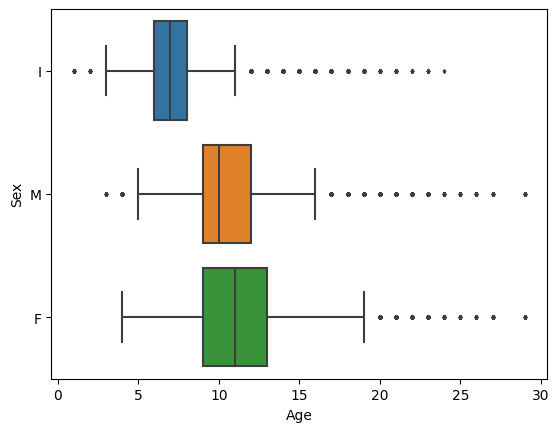

In [ ]:
#outlier detection easily hota hai
#order,color,width,linewidth,whis
sns.boxplot(x='Age',y='Sex',data=df,width=0.8,fliersize=2);


Bar charts usually just tell you the count of some items in a dataset. While that is useful, it doesn't really say much about the distribution of those items in that dataset. That's where boxplots come in: to tell you the characteristics of data. For more information:

https://www.nature.com/articles/nmeth.2807

#KDE plots

Now, we'll graph some of the other numeric data with age to try and get more information about it all relates. Display KDE plots of Age, Length, and Weight. For resources about a KDE plot:

https://www.youtube.com/watch?v=DCgPRaIDYXA

https://datagy.io/seaborn-kdeplot/

Don't make three separate cells for each of these plots. All three plots should be visible in a single row.

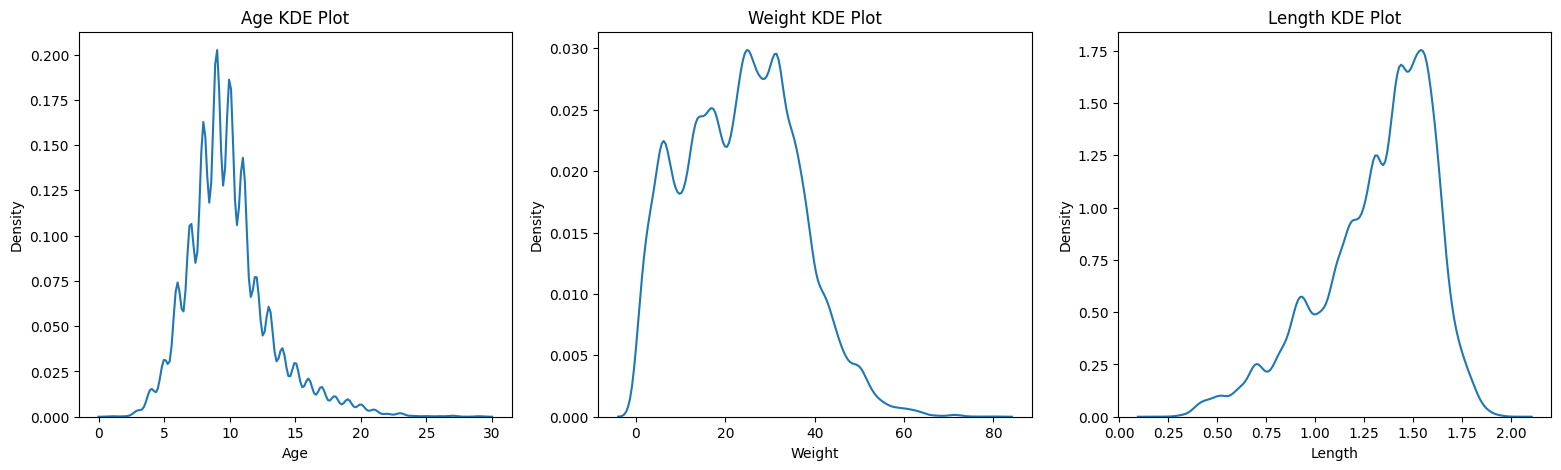

In [ ]:
plt.figure(figsize=(19, 5))
#subplot mai 1 for no of rows, 3 for no of columns, 1 for location  in the row
plt.subplot(131)
sns.kdeplot(df['Age'])
plt.title('Age KDE Plot')

plt.subplot(133)
sns.kdeplot(df['Length'])
plt.title('Length KDE Plot')

plt.subplot(132)
sns.kdeplot(df['Weight'])
plt.title('Weight KDE Plot');

#scatter plots

Make a scatterplot between Age and Diameter. Resources for the same:

https://www.youtube.com/watch?v=4yz4cMXCkuw

https://www.cuemath.com/data/scatter-plot/

<ipython-input-19-75e07af8cd69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diametersize'] = np.where(df['Diameter']<=1.075, 'Lesser than median', 'Greater than median')


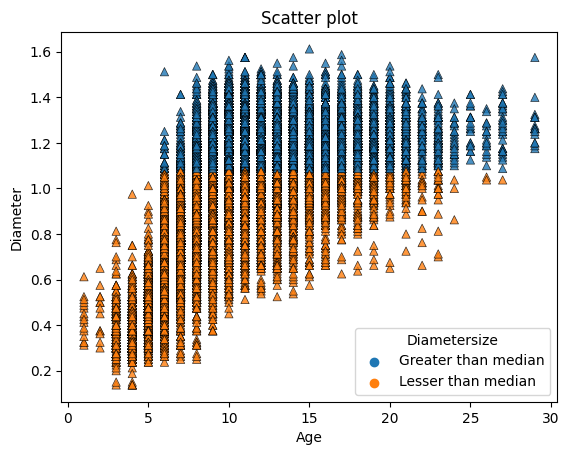

In [ ]:
df['Diametersize'] = np.where(df['Diameter']<=1.075, 'Lesser than median', 'Greater than median')


sns.scatterplot(x='Age',y='Diameter',data=df,color='r',hue='Diametersize',sizes=[20,40],alpha=0.8,marker='^',edgecolor='black')


plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel('Diameter');

# some more complex analysis

Use a function called corr(). Resource:

https://data36.com/correlation-definition-calculation-corr-pandas/



In [ ]:
df.columns
df.corr()

<ipython-input-20-83ccdacbf7b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Length  Diameter    Height    Weight  Shucked Weight  \
Length          1.000000  0.989418  0.918402  0.936407        0.915529   
Diameter        0.989418  1.000000  0.921415  0.938273        0.914199   
Height          0.918402  0.921415  1.000000  0.902231        0.864457   
Weight          0.936407  0.938273  0.902231  1.000000        0.971242   
Shucked Weight  0.915529  0.914199  0.864457  0.971242        1.000000   
Viscera Weight  0.917872  0.918357  0.883557  0.971037        0.942576   
Shell Weight    0.916954  0.922683  0.903847  0.965493        0.910317   
Age             0.612374  0.620800  0.637759  0.600839        0.502877   

                Viscera Weight  Shell Weight       Age  
Length                0.917872      0.916954  0.612374  
Diameter              0.918357      0.922683  0.620800  
Height                0.883557      0.903847  0.637759  
Weight                0.971037      0.965493  0.600839  
Shucked Weight        0.942576      0.910317  0.502877  
Viscera Weight        1.000000      0.933860  0.576436  
Shell Weight          0.933860      1.000000  0.663173  
Age                   0.576436      0.663173  1.000000

If you've been paying attention, the Profile Report above already took care of this. This table basically tells you how every column correlate with each other. Closer the number is to 1, the more they mirror each other.

From this report, it can be seen that Weight is extremely highly correlated with each of shucked weight, viscera weight and shell weight.

To actually understand what this means, we first need to know what all this crab jargon actually is. So, on Googling, you will discover the following meanings:

*   Weight - total teight
*   Shucked - weight of meat only
*   Viscera - gut weight, after bleeding
*   Shell - weight after being dried

Well, those are some pretty disgusting and gory definitions.

Moving past that, we here find that some weight statistics is lost. What about the other potential body parts of a crab? Maybe we need them to accurately predict its (apparently very short) lifespan? Maybe it is actually needed in some future model we choose to implement?

So, make a new column called "Lost Weight". Use the following formula to populate every row of it:



```
Weight - (Shucked + Viscera + Shell)
```


If this operation gives a value of Lost Weight that is less than or equal to zero, then assign zero to that row's Lost Weight value. Otherwise, assign one to it.

Also, ensure that this column is added in between Shell Weight and Age.

In [ ]:
df['Lost Weight']=df['Weight']-(df['Shucked Weight']+df['Viscera Weight']+df['Shell Weight'])
Lost_Weight=np.where(df['Lost Weight']<=0, 0 , 1)

df.pop('Lost Weight')
df.insert(loc = 8, column = 'Lost Weight', value = Lost_Weight)
df.pop('Diametersize')
df

<ipython-input-21-4facf9f48028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lost Weight']=df['Weight']-(df['Shucked Weight']+df['Viscera Weight']+df['Shell Weight'])


Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0       I  1.5250    1.1750  0.3750  28.973189       12.728926   
1       I  1.1000    0.8250  0.2750  10.418441        4.521745   
2       M  1.3875    1.1125  0.3750  24.777463       11.339800   
3       F  1.7000    1.4125  0.5000  50.660556       20.354941   
4       I  1.2500    1.0125  0.3375  23.289114       11.977664   
...    ..     ...       ...     ...        ...             ...   
74046   F  1.6625    1.2625  0.4375  50.660556       20.680960   
74047   I  1.0750    0.8625  0.2750  10.446791        4.323299   
74048   F  1.4875    1.2000  0.4125  29.483480       12.303683   
74049   I  1.2125    0.9625  0.3125  16.768729        8.972617   
74050   I  0.9125    0.6750  0.2000   5.386405        2.055339   

       Viscera Weight  Shell Weight  Lost Weight  Age  
0            6.647958      8.348928            1    9  
1            2.324659      3.401940            1    8  
2            5.556502      6.662133            1    9  
3           10.991839     14.996885            1   11  
4            4.507570      5.953395            1    8  
...               ...           ...          ...  ...  
74046       10.361742     12.332033            1   10  
74047        2.296310      3.543687            1    6  
74048        7.540967      8.079607            1   10  
74049        2.919999      4.280774            1    8  
74050        1.034757      1.700970            1    6  

[74027 rows x 10 columns]

To see how the crabs having no Lost Weight compare with those having some with respect to age, lets draw a violin plot. Resources:

https://www.youtube.com/watch?v=PNNLefP974M

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Code it below now. Here, x is the Lost Weight, and y is the Age.

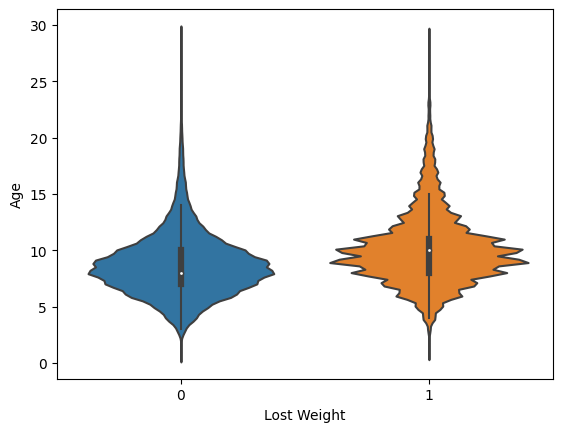

In [ ]:
sns.violinplot(x='Lost Weight',y='Age',data=df);


#make a plot of your own choosing!

Below is a link to the gallery of various plots available in seaborn.

https://seaborn.pydata.org/examples/index.html

You have free rein to make any type of graph (that should not be what we have exactly done above), between any parameters you want to compare. Make it real eye candy to look at, and also below that plot write what relevant insight you obtained from it.

<ipython-input-23-a765c43a8e04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),fmt=".2f", annot=True, cmap="YlGnBu", linewidths=0.5, linecolor='black',cbar=True,square=True);


Text(0.5, 1.0, 'Heatmap of data')

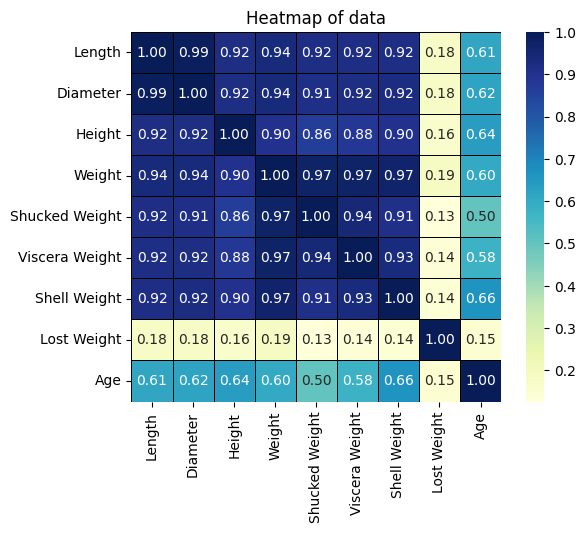

In [ ]:
#Tried lineplot,jointplot,pairgrid
sns.heatmap(df.corr(),fmt=".2f", annot=True, cmap="YlGnBu", linewidths=0.5, linecolor='black',cbar=True,square=True);
plt.title('Heatmap of data')

***Here instead of looking at the table, we get to see what Columns are closely co-related and which are not in a more visually appealing way.
Since, the above heatmap is color coded to perfection we can easily point out the columns that are not closely co-related.
Its drawback is that it cannot predict whether the factor is high or low is due to causation,3rd var or spurius.***
## For example,
It helps me determine that crabs that are generally long have a proportionate diameter.

*  This data can be used to create appropriate price brackets by wholesale crab sellers to sell on the basis of size.





In [ ]:
df['Sex'].dtypes
df['Viscera Weight'].dtypes

dtype('float64')

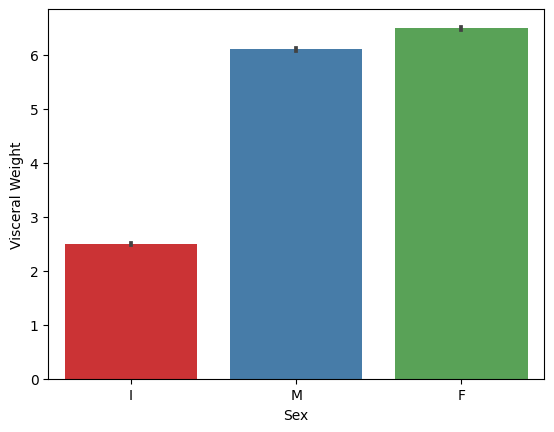

In [ ]:
sns.barplot(x=df['Sex'], y='Viscera Weight', palette='Set1',data=df)

plt.xlabel('Sex')
plt.ylabel('Visceral Weight')
plt.show()

***This is an extra Graph for analysis which shows that the crab vendor if selling by Visceral mass should charge more for M and F rather than I as visceral mass or the portion that is consumed is greater in M and F significantly and hence the crab seller can profit a lot from it.***

#one hot encoding

Machine Learning algorithms can only crunch numbers. Give it a string or text input, and it self-annihilates by throwing an error. To handle this, we use a technique called one hot encoding. Read up on it here:

https://datagy.io/pandas-get-dummies/

Then, apply it to the column titled "Sex."

In [ ]:
add = pd.get_dummies(df['Sex'],prefix='Sex',dummy_na=False,dtype='float64',)
df = pd.concat([df, add], axis=1)
df.drop('Sex', axis=1, inplace=True)
df


Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0      1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1      1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2      1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3      1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4      1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   
...       ...       ...     ...        ...             ...             ...   
74046  1.6625    1.2625  0.4375  50.660556       20.680960       10.361742   
74047  1.0750    0.8625  0.2750  10.446791        4.323299        2.296310   
74048  1.4875    1.2000  0.4125  29.483480       12.303683        7.540967   
74049  1.2125    0.9625  0.3125  16.768729        8.972617        2.919999   
74050  0.9125    0.6750  0.2000   5.386405        2.055339        1.034757   

       Shell Weight  Lost Weight  Age  Sex_F  Sex_I  Sex_M  
0          8.348928            1    9    0.0    1.0    0.0  
1          3.401940            1    8    0.0    1.0    0.0  
2          6.662133            1    9    0.0    0.0    1.0  
3         14.996885            1   11    1.0    0.0    0.0  
4          5.953395            1    8    0.0    1.0    0.0  
...             ...          ...  ...    ...    ...    ...  
74046     12.332033            1   10    1.0    0.0    0.0  
74047      3.543687            1    6    0.0    1.0    0.0  
74048      8.079607            1   10    1.0    0.0    0.0  
74049      4.280774            1    8    0.0    1.0    0.0  
74050      1.700970            1    6    0.0    1.0    0.0  

[74027 rows x 12 columns]

If correctly implemented, you will observe three new columns are added, namely, "Sex_F", "Sex_I" and "Sex_M." The old "Sex" column is now gone.

#normalisation and standardisation

To prevent some data features from dominating the model training process, we implement the above two feature scaling techniques.

Go through the below resource:

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Normalise the dataset.

For standardisation, bear in mind that the one hot encoded columns are not standardised. They are categorical in nature, so it makes no sense to shoehorn them into any type of distribution at all.

But, its ok to normalise them, as it will be scaled down to values between 0 and 1, which is the range in which they already exist anyways. Normalisation doesn't affect them.

In [ ]:
print(df.columns)

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Lost Weight', 'Age', 'Sex_F',
       'Sex_I', 'Sex_M'],
      dtype='object')


In [ ]:
df_std = pd.read_csv("/content/train.csv")

from sklearn.preprocessing import MinMaxScaler

columns=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight','Lost Weight','Age','Sex_F',
       'Sex_I', 'Sex_M']
scaler= MinMaxScaler()
df_std=df.copy()
df_std[columns] = scaler.fit_transform(df_std[columns])
df_std
# one hot encode the Sex column before running the next cell

Length  Diameter    Height    Weight  Shucked Weight  Viscera Weight  \
0      0.732750  0.703390  0.128889  0.361254        0.301278        0.307185   
1      0.499914  0.466102  0.093333  0.129449        0.106590        0.106131   
2      0.657421  0.661017  0.128889  0.308837        0.268325        0.256427   
3      0.828624  0.864407  0.173333  0.632194        0.482179        0.509197   
4      0.582091  0.593220  0.115556  0.290243        0.283457        0.207647   
...         ...       ...       ...       ...             ...             ...   
74046  0.808080  0.762712  0.151111  0.632194        0.489913        0.479895   
74047  0.486218  0.491525  0.093333  0.129803        0.101883        0.104812   
74048  0.712206  0.720339  0.142222  0.367629        0.291190        0.348715   
74049  0.561547  0.559322  0.106667  0.208783        0.212172        0.133817   
74050  0.397192  0.364407  0.066667  0.066584        0.048083        0.046144   

       Shell Weight  Lost Weight       Age  Sex_F  Sex_I  Sex_M  
0          0.291978          1.0  0.285714    0.0    1.0    0.0  
1          0.118087          1.0  0.250000    0.0    1.0    0.0  
2          0.232686          1.0  0.285714    0.0    0.0    1.0  
3          0.525660          1.0  0.357143    1.0    0.0    0.0  
4          0.207773          1.0  0.250000    0.0    1.0    0.0  
...             ...          ...       ...    ...    ...    ...  
74046      0.431988          1.0  0.321429    1.0    0.0    0.0  
74047      0.123069          1.0  0.178571    0.0    1.0    0.0  
74048      0.282511          1.0  0.321429    1.0    0.0    0.0  
74049      0.148979          1.0  0.250000    0.0    1.0    0.0  
74050      0.058296          1.0  0.178571    0.0    1.0    0.0  

[74027 rows x 12 columns]

Standardise df_std such that the one hot label encoded columns aren't affected.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_std[columns] = scaler.fit_transform(df_std[columns])
df_std

Length  Diameter    Height    Weight  Shucked Weight  Viscera Weight  \
0      0.721062  0.633720  0.291804  0.441392        0.466785        0.568812   
1     -0.757165 -0.841851 -0.797111 -1.026040       -0.994493       -0.979678   
2      0.242812  0.370225  0.291804  0.109566        0.219453        0.177881   
3      1.329744  1.635001  1.652947  2.156572        1.824588        2.124674   
4     -0.235438 -0.051367 -0.116539 -0.008142        0.333024       -0.197818   
...         ...       ...       ...       ...             ...             ...   
74046  1.199312  1.002613  0.972375  2.156572        1.882635        1.898990   
74047 -0.844119 -0.683754 -0.797111 -1.023798       -1.029827       -0.989832   
74048  0.590630  0.739118  0.700147  0.481749        0.391071        0.888664   
74049 -0.365869 -0.262163 -0.388768 -0.523817       -0.202021       -0.766444   
74050 -1.409324 -1.474239 -1.613797 -1.424006       -1.433634       -1.441687   

       Shell Weight  Lost Weight       Age     Sex_F     Sex_I     Sex_M  
0          0.452966      0.37529 -0.305481 -0.671585  1.446753 -0.759576  
1         -0.927616      0.37529 -0.620542 -0.671585  1.446753 -0.759576  
2         -0.017777      0.37529 -0.305481 -0.671585 -0.691203  1.316525  
3          2.308247      0.37529  0.324641  1.489015 -0.691203 -0.759576  
4         -0.215568      0.37529 -0.620542 -0.671585  1.446753 -0.759576  
...             ...          ...       ...       ...       ...       ...  
74046      1.564552      0.37529  0.009580  1.489015 -0.691203 -0.759576  
74047     -0.888058      0.37529 -1.250664 -0.671585  1.446753 -0.759576  
74048      0.377806      0.37529  0.009580  1.489015 -0.691203 -0.759576  
74049     -0.682355      0.37529 -0.620542 -0.671585  1.446753 -0.759576  
74050     -1.402315      0.37529 -1.250664 -0.671585  1.446753 -0.759576  

[74027 rows x 12 columns]

#**Bonus: You can research on the topic of One Hot Label Encoding vs Label Encoding only if you are done with the task. The best research may be edited and featured on the Synapse Instagram and LinkedIn pages. You can contact us for any doubts regarding this as well! Happy coding :)**

**When working with categorical data in machine learning, it is essential to convert these variables into a numerical format that algorithms can understand eg: SVM,Binary Tree. Two commonly used techniques for encoding categorical variables are one-hot and label encoding.**

Categorical encoding is the conversion of categorical data into binary values for the interpretation of various ML Algorithms.

# Types of Categorical Encoding:


*   **Label Encoding**: In label encoding, each unique category or value is mapped to an integer based on its ordinal position.
*   **One-Hot Encoding**: One-hot encoding is a technique used in data preprocessing to convert categorical data, especially nominal variables, into a binary format that machine learning algorithms can work with. It's a way to represent categorical data as binary vectors, where each category is converted into a binary feature (0 or 1).

One-Hot Encoding is a modified and more useful version of Label Encoding but Label Encoding is not completely uesless.
We will learn about these two through Similarities and Differences.



---



# 1.  **Similarities**
  

   *   Both one-hot encoding and label encoding are methods to convert categorical data into numerical format, allowing machine learning models to work with them.



# 2.   **Differences**




*   Label encoding represents each category with a unique integer. Categories are mapped to integers in a way that implies an ordinal relationship between them, even if none exists whereas One-hot encoding represents each category as a binary vector. Each category becomes a separate binary feature (0 or 1).Label encoding may for example when applied to Fruits eaten give higher priority to one than the other.This will cause irregularities in Analysis.

*   Label encoding does not increase the dimensionality of the data; it maps categories to a single integer whereas One-hot encoding increases the dimensionality of the data significantly because it creates a binary feature for each category. This can lead to a high-dimensional feature space, especially when dealing with categorical variables with many unique categories which can lead to increased preprocessing time.

*  Label encoding uses Ordinal type data whereas One-Hot Encoding uses Nominal type data.


---



***Examples***

 **Label Encoding**: Label encoding can be more used when there is a natural ordinal relationship among categories (e.g., "Low," "Medium," "High" converted to 1, 2, 3).

**One-Hot Encoding**: Cars can be encoded using this into categories such as SUV,Sedan,Hatchback,etc.


---


#***Conclusion***:

Label encoding and One-hot encoding serve the same purpose of converting categorical data into a numerical format, but they are used differently based on the nature of the categorical variable (ordinal vs. nominal) and the requirements of the machine learning model being used. It's important to choose the encoding method that best fits the data and the specific modeling task.
















